# EM algorithm to estimate the mixture probabilities

# Simulate data

In [2]:
set.seed(100)
myP <- 0.3
myMu1 <- 1; myMu2 <- 4
mySigmaSq <- 0.5
nsub <- 5000
Y <- NULL

for (i in 1:nsub) {
  if (rbinom(1, 1, myP) == 1) {
    Y <- c(Y, rnorm(1, mean = myMu1, sd = sqrt(mySigmaSq)))
  } else {
    Y <- c(Y, rnorm(1, mean = myMu2, sd = sqrt(mySigmaSq)))
  }
}

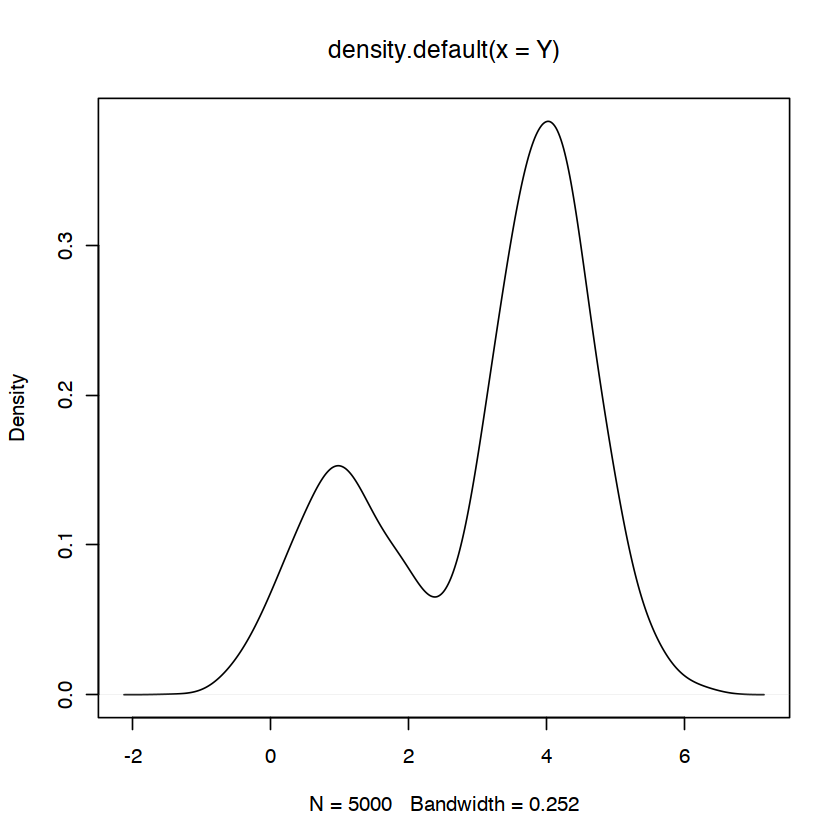

In [3]:
plot(density(Y))

# Estimate mixture prob using EM

In [4]:
myEM <- function(Y, tol=1e-6, maxit=1000){
  counter <- 0
  myP <- 0.5
  cat("iter = ", counter, "P = ", myP, "\n")
  
  while (counter <= maxit) {
    counter <- counter + 1
    denominator <- (myP*dnorm(Y, mean=myMu1, sd=sqrt(mySigmaSq))
                    + (1-myP)*dnorm(Y, mean=myMu2, sd=sqrt(mySigmaSq)))
    myP.new <- sum(myP*dnorm(Y, mean=myMu1, sd=sqrt(mySigmaSq))/denominator)/nsub
    cat("iter = ", counter, "P = ", myP.new, "\n")
    
    if (abs(myP.new-myP) < tol){  # calculate the l1 norm
      cat("\nSuccessfully Converged\n")
      cat("iter = ", counter, "P = ", myP.new, "\n")
      return(list(P = myP))
    } else {
      myP <- myP.new
    }
  }
  print("Convergence Failed")
  return(list(P = myP))
}  


In [5]:
myEM(Y)

iter =  0 P =  0.5 
iter =  1 P =  0.3046136 
iter =  2 P =  0.2948544 
iter =  3 P =  0.294315 
iter =  4 P =  0.2942849 
iter =  5 P =  0.2942832 
iter =  6 P =  0.2942831 

Successfully Converged
iter =  6 P =  0.2942831 


$P
[1] 0.2942832

Truth is 0.3. 